In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxiTrain = pd.read_pickle('../data/train.pickle')

In [4]:
taxiTrain.head()

,passenger_count,trip_duration,distance
0,1,455,1.498521
1,1,663,1.805507
2,1,2124,6.385098
3,1,429,1.485498
4,1,435,1.188588


In [5]:
taxiTrain.describe()

,passenger_count,trip_duration,distance
count,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.664530e+00,9.594923e+02,3.440864e+00
std,1.314242e+00,5.237432e+03,4.296538e+00
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,3.970000e+02,1.231837e+00
50%,1.000000e+00,6.620000e+02,2.093717e+00
75%,2.000000e+00,1.075000e+03,3.875337e+00
max,9.000000e+00,3.526282e+06,1.240909e+03


In [6]:
taxiTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1458644 non-null  int64  
 1   trip_duration    1458644 non-null  int64  
 2   distance         1458644 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 33.4 MB


In [7]:
taxiTrain.isnull().sum()

passenger_count    0
trip_duration      0
distance           0
dtype: int64

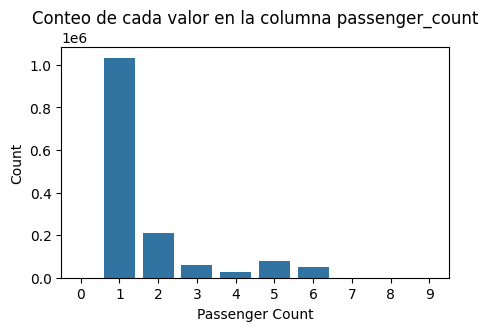

In [8]:
plt.figure(figsize=(5, 3))
sns.countplot(x='passenger_count', data=taxiTrain)
plt.title('Conteo de cada valor en la columna passenger_count')
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.show()

In [9]:
(len(taxiTrain[taxiTrain['passenger_count']==0])/len(taxiTrain))*100

0.0041134094405488935

In [10]:
(len(taxiTrain[taxiTrain['passenger_count']==7])/len(taxiTrain))*100

0.00020567047202744467

In [11]:
(len(taxiTrain[taxiTrain['passenger_count']==8])/len(taxiTrain))*100

6.855682400914823e-05

In [12]:
(len(taxiTrain[taxiTrain['passenger_count']==9])/len(taxiTrain))*100

6.855682400914823e-05

In [13]:
passCountVal = [1,2,3,4,5,6]
taxiTrain = taxiTrain[taxiTrain['passenger_count'].isin(passCountVal)]

In [14]:
Q1 = taxiTrain['distance'].quantile(0.25)
Q3 = taxiTrain['distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

outliers = taxiTrain[(taxiTrain['distance'] < lower_bound) | (taxiTrain['distance'] > upper_bound)]
print(f'Outliers quantity: {len(outliers)}')

Lower bound: -2.733397454937129
Upper bound: 7.840761512329841
Outliers quantity: 140667


In [15]:
taxiTrain[taxiTrain['distance']<=0]

,passenger_count,trip_duration,distance
246,1,227,0.0
291,2,1109,0.0
407,6,947,0.0
702,1,580,0.0
1620,1,27,0.0
...,...,...,...
1456399,1,1284,0.0
1456627,1,127,0.0
1456989,1,566,0.0
1457114,1,632,0.0


In [16]:
taxiTrain = taxiTrain[taxiTrain['distance']>0]

In [17]:
Q1 = taxiTrain['trip_duration'].quantile(0.25)
Q3 = taxiTrain['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Lower bound: {lower_bound}')
print(f'Upper bound: {upper_bound}')

outliers = taxiTrain[(taxiTrain['trip_duration'] < lower_bound) | (taxiTrain['trip_duration'] > upper_bound)]
print(f'Outliers quantity: {len(outliers)}')

Lower bound: -619.0
Upper bound: 2093.0
Outliers quantity: 73992


In [18]:
taxiTrain[taxiTrain['trip_duration']<=0]

,passenger_count,trip_duration,distance


In [19]:
(len(taxiTrain[taxiTrain['trip_duration']>2100])/len(taxiTrain))*100

5.042638081575448

In [20]:
taxiTrain = taxiTrain[taxiTrain['trip_duration']<=2100]

In [21]:
taxiTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1379438 entries, 0 to 1458643
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   passenger_count  1379438 non-null  int64  
 1   trip_duration    1379438 non-null  int64  
 2   distance         1379438 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 42.1 MB


In [22]:
features = taxiTrain.drop(columns={'trip_duration'})
objective = taxiTrain['trip_duration'].to_frame()

In [23]:
pd.to_pickle(features,'../data/features.pickle')
pd.to_pickle(objective,'../data/objective.pickle')